In [2]:
from statistics import correlation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('../../resources/fertility_rate.csv', delimiter=';')
fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2022,3.5636
2,ADB region: Central and West Asia,2021,3.6138
3,ADB region: Central and West Asia,2020,3.6272
4,ADB region: Central and West Asia,2019,3.6371
...,...,...,...
18865,Zimbabwe,1994,4.2843
18866,Zimbabwe,1993,4.3910
18867,Zimbabwe,1992,4.5672
18868,Zimbabwe,1991,4.7153


In [4]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
238,Africa,2023,4.0718
239,Africa,2022,4.1247
240,Africa,2021,4.1794
241,Africa,2020,4.2423
242,Africa,2019,4.3122
...,...,...,...
15465,South America,1994,2.8492
15466,South America,1993,2.9072
15467,South America,1992,2.9587
15468,South America,1991,3.0330


In [5]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

Iniziamo con il fare una comparazione fra il 1999 ed il 2023 sulla variazione della fertilità a seconda del continente:

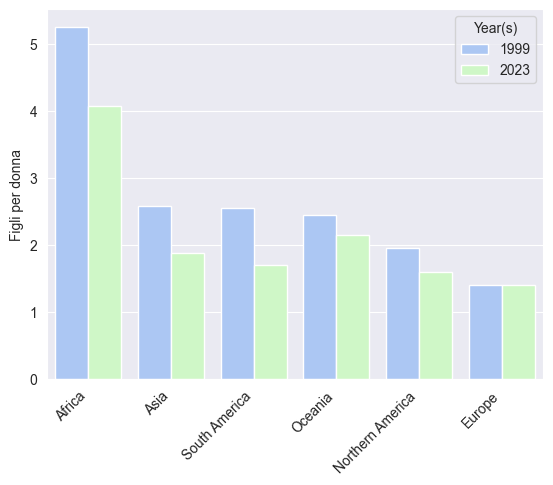

In [6]:
fertility_ds_continents_99and23 = fertility_ds_continents[(fertility_ds_continents['Year(s)'] == 1999) | (fertility_ds_continents['Year(s)'] == 2023)].sort_values(by='Value', ascending=False)
ax = sns.barplot(
    data=fertility_ds_continents_99and23,
    x='Country or Area',
    y='Value',
    hue='Year(s)',
    palette={1999: '#A0C4FF', 2023: '#CAFFBF'}
)
ax.set(xlabel=None)
plt.xticks(rotation=45, ha='right')
ax.set(ylabel='Figli per donna')
plt.show()

Grafico fertilità della Cina (caso particolare legge sul secondo figlio):

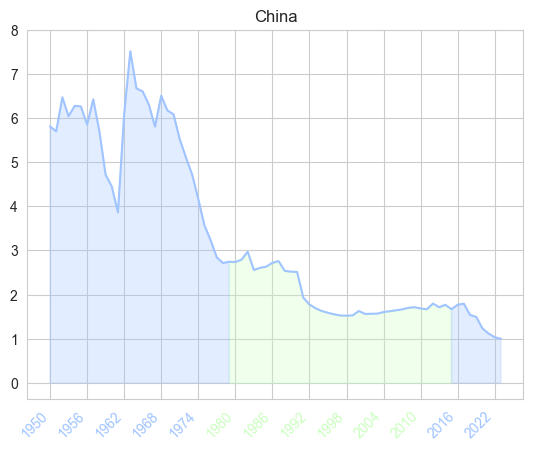

In [7]:
sns.set_style('whitegrid')
fertility_ds_china_3yspan = pd.read_csv('../../resources/fertility_rate_complete.csv', delimiter=';')
fertility_ds_china_3yspan = fertility_ds_china_3yspan[(fertility_ds_china_3yspan['Country or Area'] == 'China') & (fertility_ds_china_3yspan['Year(s)'] < 2024)]
ax = sns.lineplot(
    data=fertility_ds_china_3yspan,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
l1 = ax.lines[0]

x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(
    x1, y1,
    where=(x1 >= 1979) & (x1 <= 2015 ),
    color='#CAFFBF',
    alpha=0.3
)
ax.fill_between(
    x1, y1,
    where=(x1 <= 1979) | (x1 >= 2015),
    color='#A0C4FF',
    alpha=0.3
)
ax.set_title('China')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(range(1950, 2024, 6))
ax.set_xticklabels(labels=range(1950, 2024, 6), rotation=45, ha='right')
ax.set_yticks(np.arange(0, 8.01, 1))
for value, label in enumerate(ax.get_xticklabels()):
    year = int(label.get_text())
    if (2015 > year > 1979):
        label.set_color(color='#CAFFBF')
    else:
        label.set_color(color='#A0C4FF')
plt.show()

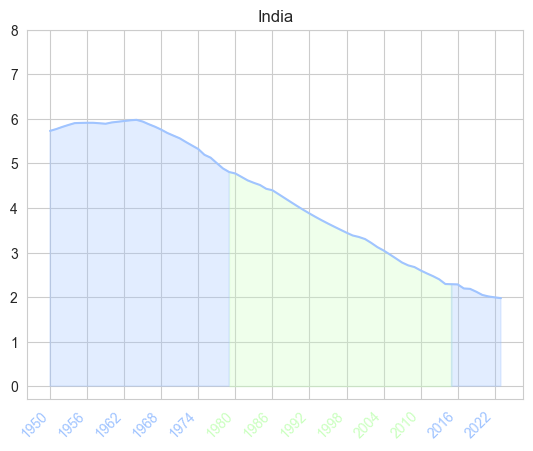

In [8]:
sns.set_style('whitegrid')
fertility_ds_india_3yspan = pd.read_csv('../../resources/fertility_rate_complete.csv', delimiter=';')
fertility_ds_india_3yspan = fertility_ds_india_3yspan[(fertility_ds_india_3yspan['Country or Area'] == 'India') & (fertility_ds_india_3yspan['Year(s)'] < 2024)]
ax = sns.lineplot(
    data=fertility_ds_india_3yspan,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
l1 = ax.lines[0]

x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
ax.fill_between(
    x1, y1,
    where=(x1 >= 1979) & (x1 <= 2015 ),
    color='#CAFFBF',
    alpha=0.3
)
ax.fill_between(
    x1, y1,
    where=(x1 <= 1979) | (x1 >= 2015),
    color='#A0C4FF',
    alpha=0.3
)
ax.set_title('India')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks(range(1950, 2024, 6))
ax.set_xticklabels(labels=range(1950, 2024, 6), rotation=45, ha='right')
ax.set_yticks(np.arange(0, 8.01, 1))
for value, label in enumerate(ax.get_xticklabels()):
    year = int(label.get_text())
    if (2015 > year > 1979):
        label.set_color(color='#CAFFBF')
    else:
        label.set_color(color='#A0C4FF')
plt.show()

In [9]:
hdi = pd.read_csv('../../resources/human_development_index.csv', delimiter=';')
hdi

,Country,1990,2000,2010,2015,2019,2020,2021,2022
0,Switzerland,"0,850","0,885","0,940","0,952","0,960","0,957","0,965","0,967"
1,Norway,"0,845","0,914","0,938","0,952","0,961","0,963","0,964","0,966"
2,Iceland,"0,834","0,895","0,927","0,948","0,958","0,955","0,957","0,959"
3,"Hong Kong, China (SAR)","0,739","0,831","0,914","0,936","0,953","0,955","0,959","0,956"
4,Denmark,"0,839","0,890","0,913","0,936","0,946","0,946","0,947","0,952"
...,...,...,...,...,...,...,...,...,...
189,Niger,"0,212","0,260","0,336","0,367","0,390","0,391","0,389","0,394"
190,Central African Republic,"0,333","0,319","0,357","0,367","0,391","0,389","0,387","0,387"
191,South Sudan,..,..,"0,406","0,381","0,391","0,386","0,381","0,381"
192,Somalia,..,..,..,..,..,..,..,"0,380"


In [10]:
hdi_10years = hdi.filter(items=['Country', '1990', '2000', '2010', '2020'])
hdi_10years = pd.melt(hdi_10years, id_vars='Country', value_vars=['1990', '2000', '2010', '2020'], var_name='Year', value_name='Value')
hdi_10years

,Country,Year,Value
0,Switzerland,1990,"0,850"
1,Norway,1990,"0,845"
2,Iceland,1990,"0,834"
3,"Hong Kong, China (SAR)",1990,"0,739"
4,Denmark,1990,"0,839"
...,...,...,...
771,Niger,2020,"0,391"
772,Central African Republic,2020,"0,389"
773,South Sudan,2020,"0,386"
774,Somalia,2020,..


Trend del Human Index Development in Europa (campione preso osservando Italia, Francia, UK, Grecia, Spagna e Germania):

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1415293264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)


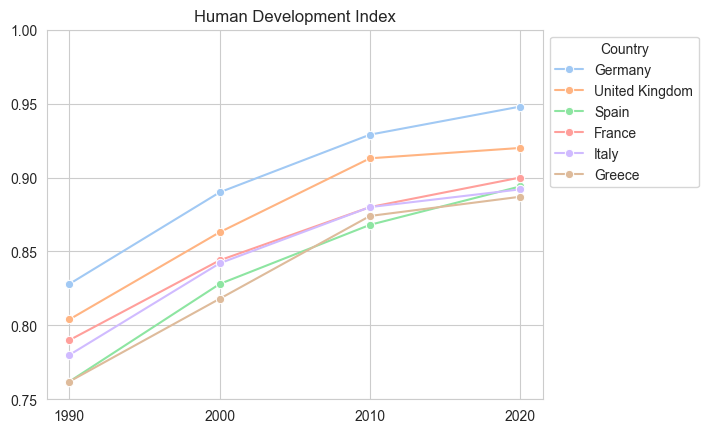

In [11]:
def convert_to_float(value: str) -> float:
    try:
        return float(value.replace(',', '.'))
    except ValueError:
        return float('nan')

hdi_10years_europe = hdi_10years[(hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'France') | (hdi_10years['Country'] == 'Germany') | (hdi_10years['Country'] == 'Spain') | (hdi_10years['Country'] == 'United Kingdom') | (hdi_10years['Country'] == 'Greece')]
hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_europe,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(.75, 1.01, .05))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Osservazione del HDI con alcuni casi specifici in vari continenti:

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\3078348177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)


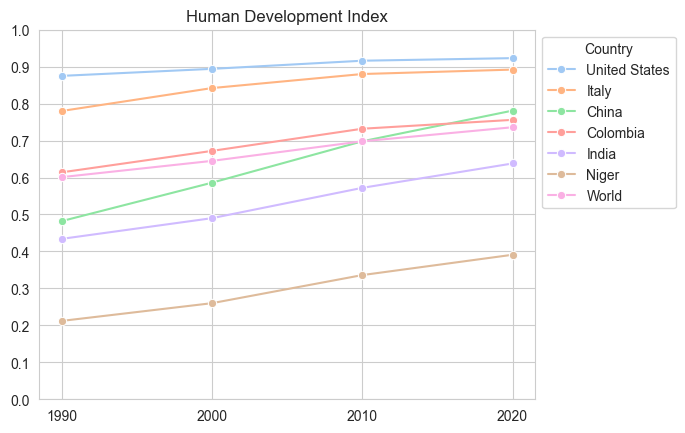

In [12]:
hdi_10years_mixed = hdi_10years[(hdi_10years['Country'] == 'China') | (hdi_10years['Country'] == 'India') | (hdi_10years['Country'] == 'Niger') | (hdi_10years['Country'] == 'Colombia') | (hdi_10years['Country'] == 'United States') | (hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'World')]
hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_mixed,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(0, 1.01, .1))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Correlazione fra fertilità e HDI in alcuni stati:

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\511201643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)


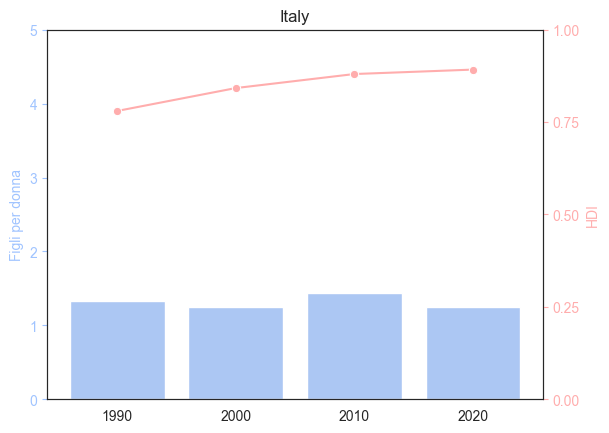

In [25]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_italy_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'Italy') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_italy_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('Italy')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_italy = hdi_10years[(hdi_10years['Country'] == 'Italy')]
hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_italy,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1415678156.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)


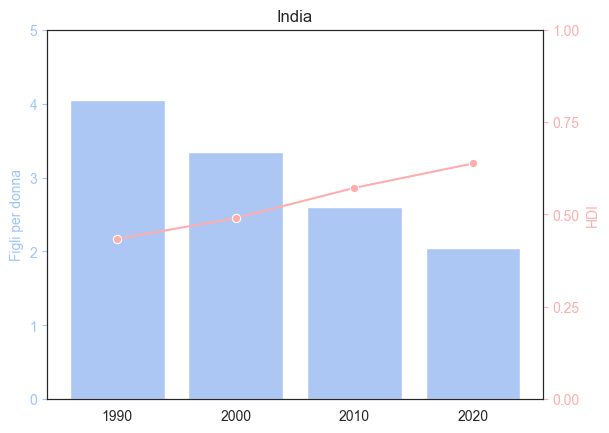

In [26]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_india_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'India') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_india_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('India')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_india = hdi_10years[(hdi_10years['Country'] == 'India')]
hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_india,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\4052540156.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_china['Value'] = hdi_10years_china['Value'].apply(convert_to_float)


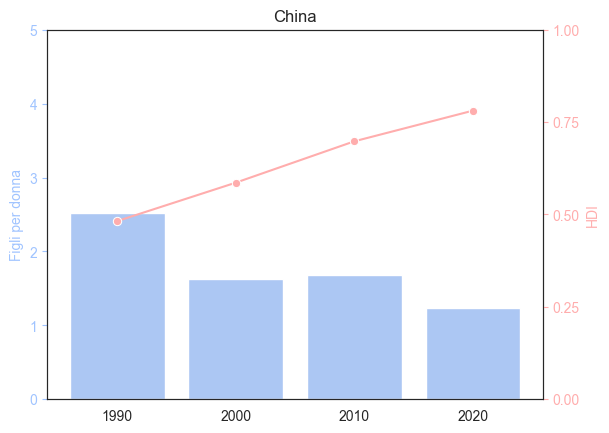

In [27]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_china_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'China') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_china_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('China')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_china = hdi_10years[(hdi_10years['Country'] == 'China')]
hdi_10years_china['Value'] = hdi_10years_china['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_china,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_19412\1232503513.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_egypt['Value'] = hdi_10years_egypt['Value'].apply(convert_to_float)


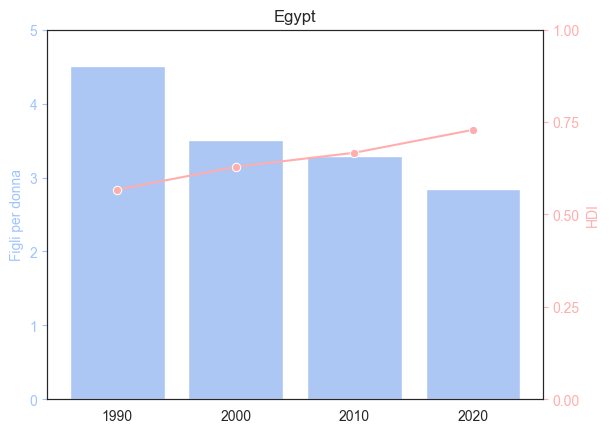

In [28]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_egypt_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'Egypt') & ((fertility_ds['Year(s)'] == 1990) | (fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_egypt_90to20,
    x='Year(s)',
    y='Value',
    color='#A0C4FF'
)
ax1.set_title('Egypt')
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#A0C4FF')
ax1.set_yticks(np.arange(0, 5.01, 1))
ax1.tick_params(axis='y', colors='#A0C4FF')

ax2 = ax1.twinx()

hdi_10years_egypt = hdi_10years[(hdi_10years['Country'] == 'Egypt')]
hdi_10years_egypt['Value'] = hdi_10years_egypt['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_egypt,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(0, 1.01, .25))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

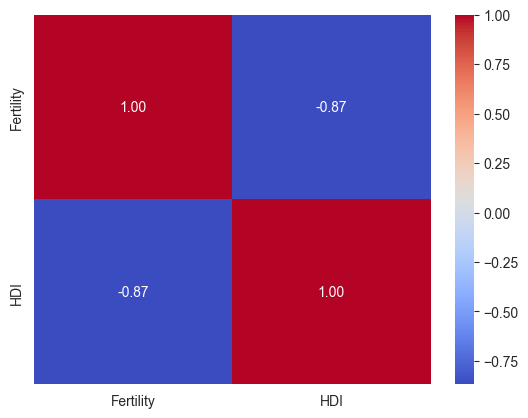

In [17]:
# TODO: da finire heatmap
def convert_to_integer(x):
    return int(x)

df1 = fertility_ds
df1 = df1.rename(columns={'Country or Area': 'Country'})
df2 = hdi_10years
df2 = df2.rename(columns={'Year': 'Year(s)'})
df2['Year(s)'] = df2['Year(s)'].apply(convert_to_integer)
df2['Value'] = df2['Value'].apply(convert_to_float)

merged_data = pd.merge(df1, df2, on=['Country', 'Year(s)'])
merged_data = merged_data.rename(columns={'Value_x': 'Fertility', 'Value_y': 'HDI'})
correlation_matrix = merged_data[['Fertility', 'HDI']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [18]:
gii = pd.read_json('../../resources/gender_inequality_index.json')
gii_world = gii[gii['country'] == 'World']
gii_world

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
28906,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1990,50.981,
28907,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1991,46.501,
28908,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1992,46.933,
28909,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1993,45.938,
28910,ZZK.WORLD,World,GII,Gender Inequality Index,,lfpr_f,"Labour force participation rate, female (% age...",1994,45.887,
...,...,...,...,...,...,...,...,...,...,...
29066,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2018,209.144,
29067,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2019,210.076,
29068,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2020,206.745,
29069,ZZK.WORLD,World,GII,Gender Inequality Index,,mmr,"Maternal Mortality Ratio (deaths per 100,000 l...",2021,211.729,


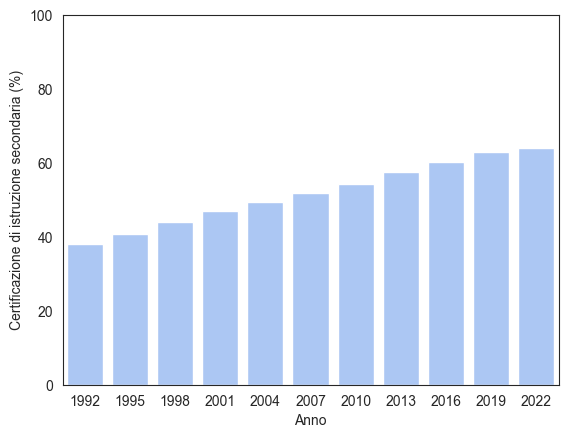

In [19]:
ax = sns.barplot(
    data=gii_world[(gii_world['year'] % 3 == 0) & (gii_world['indicator'] == 'Population with at least some secondary education, female (% ages 25 and older)')],
    x='year',
    y='value',
    color='#A0C4FF'
)
ax.set_title('')
ax.set(xlabel='Anno')
ax.set(ylabel='Certificazione di istruzione secondaria (%)')
ax.set_yticks(np.arange(0, 100.01, 20))
plt.show()

In [20]:
gii_99and22 = gii[((gii['year'] == 2022) | (gii['year'] == 1998)) & (gii['indicator'] == 'Population with at least some secondary education, female (% ages 25 and older)')]
gii_99and22 = gii_99and22[(gii_99and22['country'] == 'China') | (gii_99and22['country'] == 'Italy') | (gii_99and22['country'] == 'United States') | (gii_99and22['country'] == 'India') | (gii_99and22['country'] == 'Korea (Republic of)')]
gii_99and22

,countryIsoCode,country,indexCode,index,dimension,indicatorCode,indicator,year,value,note
4814,CHN,China,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1998,40.245,
4838,CHN,China,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,79.702,
11097,IND,India,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1998,19.165,
11121,IND,India,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,40.959,
12077,ITA,Italy,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1998,55.652,
12101,ITA,Italy,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,78.627,
13445,KOR,Korea (Republic of),GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1998,66.943,
13469,KOR,Korea (Republic of),GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,83.781,
25966,USA,United States,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,1998,92.520,
25990,USA,United States,GII,Gender Inequality Index,,se_f,Population with at least some secondary educat...,2022,95.424,
